In [1]:
with open('nytimes.txt', 'r', encoding='utf8') as f:
    content = f.read()

In [2]:
import nltk
from nltk.corpus import stopwords
import re

In [3]:
def do_En_preprocessing(text, customized_stopwords):
    cleaned_content = re.sub(r'[^\w\d\s]','',text) # To remove symbols
    cleaned_content = cleaned_content.lower() # Case conversion, upper -> lower
    word_tokens = nltk.word_tokenize(cleaned_content) # Tokenization
    tokens_pos = nltk.pos_tag(word_tokens) # POS tagging
    NN_words = []   # To select nouns
    for word, pos in tokens_pos:
        if 'NN' in pos:
            NN_words.append(word)
            
    wlem = nltk.WordNetLemmatizer()   # Lemmatization
    lemmatized_words = []
    for word in NN_words:
        lemmatized_words.append(wlem.lemmatize(word))
    # 불용어 제거    
    stopwords_list = stopwords.words('english')
    unique_NN_words = set(lemmatized_words)
    final_NN_words = lemmatized_words
    for word in unique_NN_words:
        if word in stopwords_list:
            while word in final_NN_words: 
                final_NN_words.remove(word)
    
    unique_NN_words1 = set(final_NN_words)
    for word in unique_NN_words1:
        if word in customized_stopwords:
            while word in final_NN_words: 
                final_NN_words.remove(word)
    
    return final_NN_words

In [4]:
customized_stopwords = ['york', 'time', 'news']

In [5]:
final_words = do_En_preprocessing(content, customized_stopwords)

In [6]:
print(final_words)

['hurray', 'hotblack', 'coffee', 'cafe', 'toronto', 'wifi', 'customer', 'cafe', 'city', 'location', 'café', 'grumpy', 'hotblacks', 'reason', 'blackout', 'cause', 'hosanna', 'president', 'jimson', 'bienenstock', 'aim', 'customer', 'device', 'vibe', 'vehicle', 'interaction', 'commodity', 'idea', 'bienenstock', 'science', 'decade', 'interaction', 'contributor', 'health', 'longevity', 'evidence', 'value', 'connection', 'morning', 'walk', 'woman', 'swim', 'locker', 'room', 'ymca', 'use', 'device', 'locker', 'room', 'experience', 'friend', 'share', 'joy', 'woman', 'problem', 'board', 'advice', 'counsel', 'laugh', 'brightens', 'day', 'study', 'life', 'harvard', 'health', 'watch', 'dozen', 'study', 'people', 'relationship', 'family', 'friend', 'community', 'health', 'problem', 'longer', 'study', 'men', 'woman', 'county', 'calif', 'lisa', 'berkman', 'leonard', 'syme', 'people', 'others', 'nineyear', 'study', 'people', 'tie', 'robbins', 'book', 'health', 'longevity', 'difference', 'survival', 'p

## Frequency analysis using Counter

In [7]:
from collections import Counter
c = Counter(final_words)
print(c)

Counter({'health': 11, 'people': 11, 'researcher': 7, 'study': 6, 'tie': 6, 'interaction': 5, 'friend': 4, 'others': 4, 'exercise': 4, 'connection': 3, 'woman': 3, 'problem': 3, 'lifestyle': 3, 'lack': 3, 'heart': 3, 'death': 3, 'connectedness': 3, 'disease': 3, 'research': 3, 'inflammation': 3, 'texas': 3, 'seppala': 3, 'cafe': 2, 'customer': 2, 'reason': 2, 'bienenstock': 2, 'device': 2, 'longevity': 2, 'evidence': 2, 'locker': 2, 'room': 2, 'life': 2, 'men': 2, 'robbins': 2, 'book': 2, 'practice': 2, 'obesity': 2, 'habit': 2, 'journal': 2, 'risk': 2, 'university': 2, 'center': 2, 'condition': 2, 'mortality': 2, 'loneliness': 2, 'isolation': 2, 'blood': 2, 'pressure': 2, 'level': 2, 'stress': 2, 'wellbeing': 2, 'report': 2, 'behavior': 2, 'percent': 2, 'hurray': 1, 'hotblack': 1, 'coffee': 1, 'toronto': 1, 'wifi': 1, 'city': 1, 'location': 1, 'café': 1, 'grumpy': 1, 'hotblacks': 1, 'blackout': 1, 'cause': 1, 'hosanna': 1, 'president': 1, 'jimson': 1, 'aim': 1, 'vibe': 1, 'vehicle': 1

In [8]:
c.most_common(10)

[('health', 11),
 ('people', 11),
 ('researcher', 7),
 ('study', 6),
 ('tie', 6),
 ('interaction', 5),
 ('friend', 4),
 ('others', 4),
 ('exercise', 4),
 ('connection', 3)]

## Word cloud

직사각형 형태로 시각화 해보기

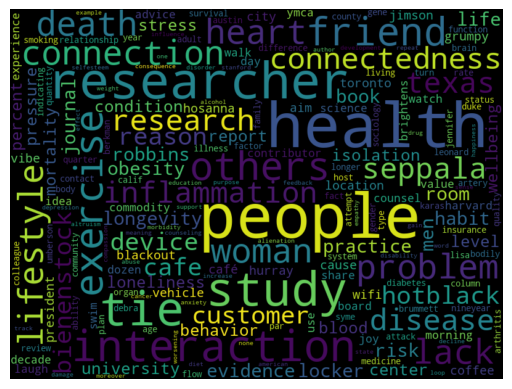

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

total_words = ' '.join(final_words)

# print(total_words)

wordcloud = WordCloud(max_font_size=100, width=800, height=600, background_color='black')#, background_color='pink')
wordcloud.generate(total_words)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("nytimes.png") # to save at the working folder

In [10]:
' '.join(final_words)

'hurray hotblack coffee cafe toronto wifi customer cafe city location café grumpy hotblacks reason blackout cause hosanna president jimson bienenstock aim customer device vibe vehicle interaction commodity idea bienenstock science decade interaction contributor health longevity evidence value connection morning walk woman swim locker room ymca use device locker room experience friend share joy woman problem board advice counsel laugh brightens day study life harvard health watch dozen study people relationship family friend community health problem longer study men woman county calif lisa berkman leonard syme people others nineyear study people tie robbins book health longevity difference survival people age gender health practice health status fact researcher tie lifestyle obesity lack exercise tie living habit robbins people lifestyle tie study journal medicine researcher health insurance plan men heart attack connection people quarter risk death year connectedness researcher duke un

원의 형태로 시각화 해보기

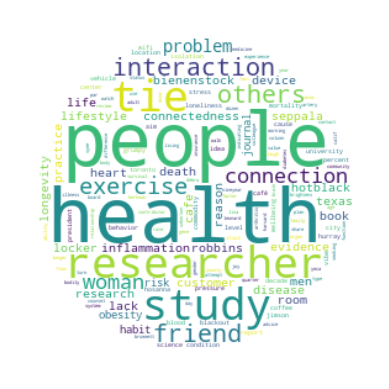

In [11]:
import numpy as np
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color='white', repeat=True, mask=mask)
wc.generate(total_words)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()
wc.to_file("circle.png")

마스크 이미지를 배경으로 시각화 하기

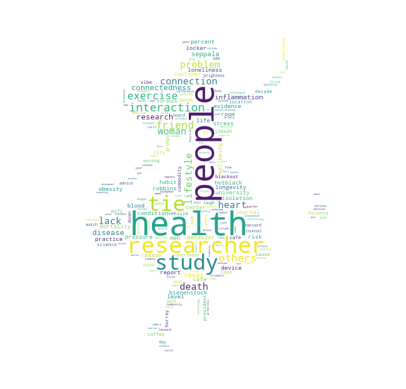

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud

# 마스크 이미지를 불러온 후, 넘파이의 어레이 형태로 변환합니다.
alice_mask = np.array(Image.open("alice_mask.png"))

# WordCloud() 생성자 함수의 mask 파라미터를 해당 alice_mask로 지정합니다.
wc1 = WordCloud(background_color="white", width=674, height=643, mask=alice_mask)

# generate word cloud
wc1.generate(total_words)

# store to file
wc1.to_file("alice_wc.png")

plt.figure()
plt.imshow(wc1)
plt.axis("off")
plt.show()